# Telco - Analysis of Churn and Its Uncommon Drivers

In [1]:
# Importing required modules.

import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import urllib.request
from PIL import Image
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import chi2
from acquire1 import *
from prepare1 import *
from explore1 import *
import env

### Acquiring the initial dataset.

In [2]:
df = prep_telco(get_telco_data())

### Splitting and preparing the data for preliminary exploration.

In [3]:
train, validate, test = prep_split(df, "churn")
drop_col = ["customer_id", "gender", "partner", "dependents", "phone_service", "multiple_lines",             "online_security", "online_backup", "device_protection", "tech_support", "streaming_tv", 
"streaming_movies", "paperless_billing", "churn", "contract_type", "internet_service_type", "payment_type"]
train = train.drop(columns = drop_col)
validate = validate.drop(columns = drop_col)
test = test.drop(columns = drop_col)

### Exploring the data for significant contributing factors of churn.

We reject the null hypothesis that senior_citizen and churn_encoded are independent.
There appears to be a relationship between churn_encoded and senior_citizen.

We reject the null hypothesis that tenure and churn_encoded are independent.
There appears to be a relationship between churn_encoded and tenure.

We fail to reject the null hypothesis that gender_encoded and churn_encoded are independent.
There appears to be no relationship between  churn_encoded and  gender_encoded .

We reject the null hypothesis that partner_encoded and churn_encoded are independent.
There appears to be a relationship between churn_encoded and partner_encoded.

We reject the null hypothesis that dependents_encoded and churn_encoded are independent.
There appears to be a relationship between churn_encoded and dependents_encoded.

We fail to reject the null hypothesis that phone_service_encoded and churn_encoded are independent.
There appears to be no relationship between  churn_encoded and  phone_service_e

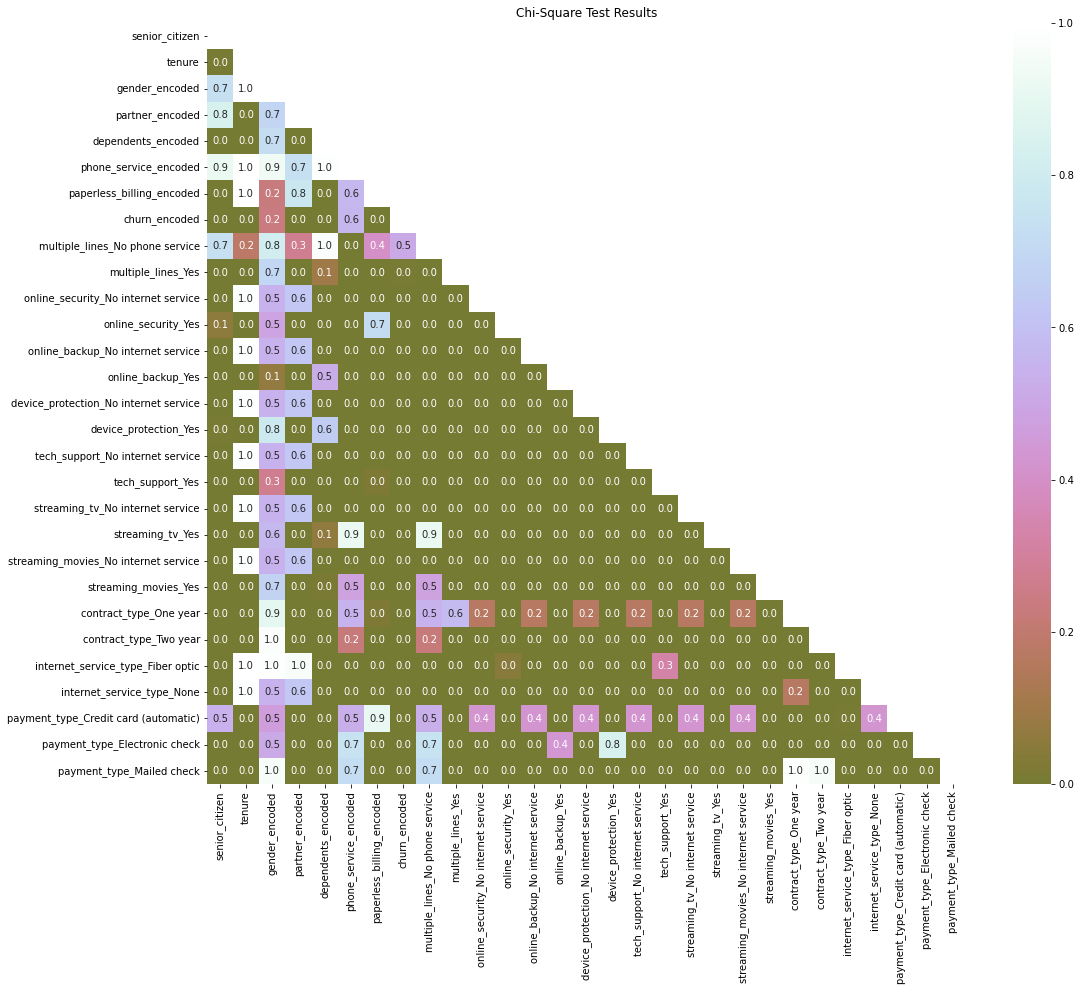

In [4]:
num_type_list, cat_type_list = dtypes_to_list(train)
cat_analysis(train, "churn_encoded", cat_type_list)

### Choosing which variables are worthy of further analysis.

##### The only variables that were insignificant after being evaluated by a chi squared test were gender and phone service type.

##### I chose to analyze variables that were not directly related to price. Therefore, my analysis encompassed the possible relationship between payment type and churn.

### My Hypotheses

##### H0 = Though correlated, payment type does not effect churn enough to warrant further investigation.

##### Ha = Payment type is a possible driver for churn and warrants further investigation.

### Choosing and creating models to evaluate my training data.

In [5]:
# Creating my baseline prediction.

baseline_accuracy = round((train.churn_encoded == 0).mean(), 2)
print("Baseline accuracy is", baseline_accuracy, ".")

# Create my X and y values for each stratification.

X_train, y_train = train, train.churn_encoded
X_validate, y_validate = validate, validate.churn_encoded
X_test, y_test = test, test.churn_encoded

Baseline accuracy is 0.73 .


##### I chose to use Logistic Regression, Random Forest, and Decision Tree models on this dataset.

##### I would then evaluate them to choose the best one for testing later on.

In [6]:
# Creating the logistic regression.
logreg = LogisticRegression(random_state = 249)

# Specifying the columns with payment type.
selected_feats = ["payment_type_Credit card (automatic)", "payment_type_Electronic check", "payment_type_Mailed check"]

# Fitting a model using only these specified features.
logreg.fit(X_train[selected_feats], y_train)

# Then predicting.
y_preds = logreg.predict(X_train[selected_feats])
y_preds_val = logreg.predict(X_validate[selected_feats])

In [7]:
# Evaluating my logistic regression model.

print("Baseline accuracy is", baseline_accuracy, ".")
print("Logistic Regression used payment type features.")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train[selected_feats], y_train)))

train_class = pd.DataFrame(classification_report(y_train, y_preds, output_dict = True, 
labels = np.unique(y_preds)))
display(train_class)

print('Accuracy of Logistic Regression classifier on validation set: {:.2f}'
     .format(logreg.score(X_validate[selected_feats], y_validate)))

val_class = pd.DataFrame(classification_report(y_validate, y_preds_val, output_dict = True, 
labels = np.unique(y_preds)))
display(val_class)

Baseline accuracy is 0.73 .
Logistic Regression used payment type features.
Accuracy of Logistic Regression classifier on training set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734675,0.734675,0.734675,0.734675
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.847046,0.847046,0.847046,0.847046
support,3104.000000,3104.000000,3104.000000,3104.000000


Accuracy of Logistic Regression classifier on validation set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734564,0.734564,0.734564,0.734564
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.846972,0.846972,0.846972,0.846972
support,1035.000000,1035.000000,1035.000000,1035.000000


In [8]:
# Creating, fitting, and predicting with the decision tree.

dectree = DecisionTreeClassifier()
dectree.fit(X_train[selected_feats], y_train)
y_preds = dectree.predict(X_train[selected_feats])
y_preds_val = dectree.predict(X_validate[selected_feats])

In [9]:
#Evaluating my Decision Tree.

print("Baseline accuracy is", baseline_accuracy, ".")
print("Decision Tree used payment type features.")
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dectree.score(X_train[selected_feats], y_train)))

train_class = pd.DataFrame(classification_report(y_train, y_preds, output_dict = True, 
labels = np.unique(y_preds)))
display(train_class)

print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
     .format(dectree.score(X_validate[selected_feats], y_validate)))

val_class = pd.DataFrame(classification_report(y_validate, y_preds_val, output_dict = True, 
labels = np.unique(y_preds)))
display(val_class)

Baseline accuracy is 0.73 .
Decision Tree used payment type features.
Accuracy of Decision Tree classifier on training set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734675,0.734675,0.734675,0.734675
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.847046,0.847046,0.847046,0.847046
support,3104.000000,3104.000000,3104.000000,3104.000000


Accuracy of Decision Tree classifier on validation set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734564,0.734564,0.734564,0.734564
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.846972,0.846972,0.846972,0.846972
support,1035.000000,1035.000000,1035.000000,1035.000000


In [10]:
# Creating, fitting, and predicting with the random forest model.

run_forest_run = RandomForestClassifier(max_depth = 50, random_state = 249)
run_forest_run.fit(X_train[selected_feats], y_train)
y_preds = run_forest_run.predict(X_train[selected_feats])
y_preds_val = run_forest_run.predict(X_validate[selected_feats])

In [11]:
# Evaluating my Random Forest model.

print("Baseline accuracy is", baseline_accuracy, ".")
print("Random Forest used payment type features.")
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(run_forest_run.score(X_train[selected_feats], y_train)))

train_class = pd.DataFrame(classification_report(y_train, y_preds, output_dict = True, 
labels = np.unique(y_preds)))
display(train_class)

print('Accuracy of Random Forest classifier on validation set: {:.2f}'
     .format(run_forest_run.score(X_validate[selected_feats], y_validate)))

val_class = pd.DataFrame(classification_report(y_validate, y_preds_val, output_dict = True, 
labels = np.unique(y_preds)))
display(val_class)

Baseline accuracy is 0.73 .
Random Forest used payment type features.
Accuracy of Random Forest classifier on training set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734675,0.734675,0.734675,0.734675
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.847046,0.847046,0.847046,0.847046
support,3104.000000,3104.000000,3104.000000,3104.000000


Accuracy of Random Forest classifier on validation set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734564,0.734564,0.734564,0.734564
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.846972,0.846972,0.846972,0.846972
support,1035.000000,1035.000000,1035.000000,1035.000000


##### All my models did only as well as baseline. This is not a good sign. I will continue to validation and testing for the sake of the project using Logistic Regression.

In [12]:
# Creating the logistic regression for my test data.

logreg = LogisticRegression(random_state = 249)

logreg.fit(X_test[selected_feats], y_test)

y_preds = logreg.predict(X_test[selected_feats])

Baseline accuracy is 0.73 .
Logistic Regression used payment type features.
Accuracy of Logistic Regression classifier on test set: 0.73


,0,micro avg,macro avg,weighted avg
precision,0.734675,0.734675,0.734675,0.734675
recall,1.000000,1.000000,1.000000,1.000000
f1-score,0.847046,0.847046,0.847046,0.847046
support,3104.000000,3104.000000,3104.000000,3104.000000


,tolerance,accuracy
0,0.0,0.265436
1,0.1,0.265436
2,0.2,0.265436
3,0.3,0.265436
4,0.4,0.265436
5,0.5,0.265436
6,0.6,0.297374
7,0.7,0.297374
8,0.8,0.297374
9,0.9,0.734564


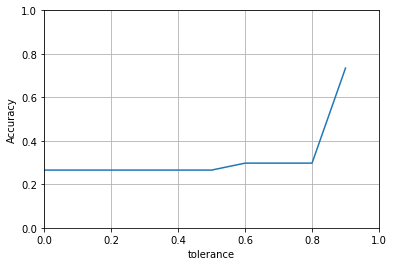

In [15]:
print("Baseline accuracy is", baseline_accuracy, ".")
print("Logistic Regression used payment type features.")
print('Accuracy of Logistic Regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test[selected_feats], y_test)))

test_class = pd.DataFrame(classification_report(y_test, y_preds, output_dict = True, 
labels = np.unique(y_preds)))
display(train_class)

y_pred_proba = logreg.predict_proba(X_test[selected_feats])
y_pred_proba = pd.DataFrame(y_pred_proba, columns = ["churned", "not_churned"])

tolerance, model_scores = [], []

for i in np.arange(0,1,.1):
    y_pred = (y_pred_proba.churned > i).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores.append(accuracy)
    tolerance.append(i.round(1))

scores = {"tolerance":tolerance, "accuracy":model_scores}

df = pd.DataFrame(scores)
display(df)

graph = sns.lineplot(data = df, x = "tolerance", y = "accuracy")
graph.set_xlim(0, 1)
graph.set_ylim(0, 1)
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## Conclusions and Takeaway

##### As stated before, my models did not beat baseline. This means I could not reject my null hypothesis. Even though payment types are significantly correlated with churn, they are not a beneficial predictor of it.

##### This may mean that customers have a decently satisfactory experience when paying their bills that not enough issues crop up to cause alarm for affecting churn. Kudos to the financial operations of Telco.

##### Further investigation is needed to inquire about the usefulness of other variables that are not related to service charges to predict churn. Otherwise, this may be a cut and dry case of overcharging for a mediocre product/service.

In [ ]:
df = y_pred_proba
df.to_csv("predictions.csv")